In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [17]:
df=pd.read_csv("review.csv")

C:\Users\simli\AppData\Local\Temp\ipykernel_7308\4066403479.py:1: DtypeWarning: Columns (1,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv("review.csv")


In [18]:
df = df[['reviews.text', 'reviews.rating']].dropna()


In [19]:
def map_sentiment(rating):
    if rating in [1, 2]:
        return 'negative'
    elif rating == 3:
        return 'neutral'   # Optional: you may choose to drop these
    else:
        return 'positive'

df['sentiment'] = df['reviews.rating'].apply(map_sentiment)

In [20]:
df = df[df['sentiment'] != 'neutral']

In [21]:
X = df['reviews.text']
y = df['sentiment']


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

In [26]:
from sklearn.naive_bayes import MultinomialNB

In [27]:
model = MultinomialNB()
model.fit(X_train_vect, y_train)

MultinomialNB()

In [28]:
y_pred = model.predict(X_test_vect)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix

In [30]:
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

Classification Report:

              precision    recall  f1-score   support

    negative       1.00      0.01      0.02       162
    positive       0.98      1.00      0.99      6464

    accuracy                           0.98      6626
   macro avg       0.99      0.51      0.51      6626
weighted avg       0.98      0.98      0.96      6626



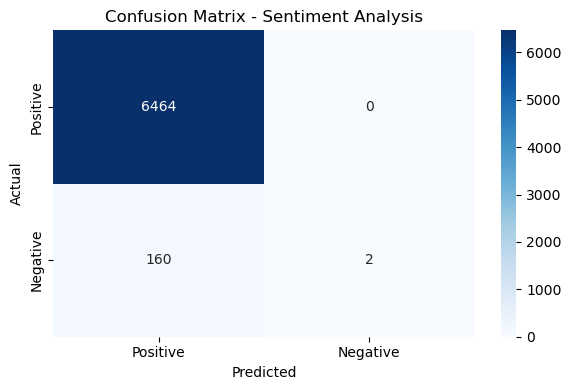

In [31]:
cm = confusion_matrix(y_test, y_pred, labels=['positive', 'negative'])
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Sentiment Analysis')
plt.tight_layout()
plt.show()